# Welcome to Assignment 3 - Part 2 🥳


---
TA: Elmira Amooei

Questions?: Rather than email, please ask any questions through the Discussion Board on Brightspace. That way, everyone can benefit from the answer

** Deadline: See Brightspace end date**

---

### Working in teams of 2
Complete Part 2 of Assignment 3 in the same team of two students that you formed in Part 1. A single submission per team is required on Brightspace.

### Objective:
In this assignment, we are going to listen to some jazz and disco!
Yes, you read it right. We are using the GTZAN dataset to create a classifier that can tell what the music genre is! 🎷🎸🎹🎺


### Details:
In this part, you are going to implement two models.
The first model is your own **proposed model** (the exact same one you proposed in Part One). And the second model is the **pretrained model** you selected in Part One.

### Instructions:
**DO NOT** wait to the last minute to complete this assignment as it can take hours hours to do this assignment if you are unfmiliar with Python and Machine Learning libraries.

❗Your solutions must be self-contained in this notebook; no other supplementary material or files will be accepted. As soon as I open your assignment's notebook , I will click "runtime" → "run all". Ensure your notebook works properly without any errors and your results are clearly displayed, as instructed.

**Dataset:**
You are provided with two datasets on Brightspace, to be used in Parts 1 & 2 of Assignment. Download the dataset of your choice (*Note that you must use the dataset that you selected in your proposal in Assignment 3 Part 1*), store it in your Google Drive (you need a gmail account to do this). It should be under your "My Drive" (After uploading it to your Google Drive, check the location by right clicking on the file *-> File Information -> Details -> Location*).  **Do not** put it into any sub-folder as  I won't be able to run your code. It will raise an error and you will lose marks.

**Metrics:**
You must create a **confusion matrix** for each of the models you are implementing. A part of your assessment of this assignment is based on the language you use to *interpret what your confusion matrices are showing* and how you would *compare the performance of the two models* based on that.

**Pytorch:** is what we used for Assignment 2, and we are using it here as well.

**Q&A:**
There are some question boxes in *markdown blocks* marked with (🎧🎸) emojis. Your answers to these question blocks should go on the *markdown blocks* marked with (📻🎹) emojis. Just double-click on the emoji and you can start typing.*Note that I will skip over any text answers that are within the code blocks.*

**Libraries:** You can add any library you might need that is not already imported. *If you are using a library that needs to be installed on Colab, please provide the command for it in the specified code block in Section 1.1 Initializations.*

**Optional steps:** There are some code blocks marked as optional. However, feel free to really show your work and add in as much extra info as you want. This may result in bonus points based on what you are doing.😉
Examples:
 * It is optional to use cross-validation in this assignment, but you will get a bonus point for implementing it. 🎙️

 * It is optional to use a grid search to tune your hyperparameters for your own model, but you will get a bonus point for implementing it. 🎙️


**Runtime tips:** I suggest doing your coding and first making sure everything works fine on a CPU. Then do the actual model training on a GPU. To chage your runtime from CPU to GPU and vice versa, select **Runtime** -> **Change Runtime Type** -> under **Hardware accelerator** click on CPU or T4 GPU.

**Submission:** Submit your Notebook as a *.ipynb* file that adopts this naming convention: ***SYSC4415W24_A3_Student1_Student2.ipynb*** on *Brightspace*. No other submission (e.g., through email) will be accepted. (Example file name: SYSC4415W24_A3_ElmiraAmooei_AnthonyFuller.ipynb)

### Grading:
Considering the fact that Elmira is really generous with marking and she wants to see if you understand the point of data exploration, pretraining, confusion matrix, etc., she is very strict with plagiarism. Therefore, for the text answers, she will not show mercy with **suspicious** cases and they will be sent to the Associate Dean for investigation. However, it is alright if you need to consult with Chat-GPT/online resources to figure out **some parts of the code**. Although, remember that I will see a huge ton of submissions that look identical and you might get unlucky! ☠️

You will be evaluated on the performance your model achieved. Try to tune your model to achieve the best possible results you can. You are asked in a *markdown block* to explain what you attempted and explored. (Your work is not compared with any other teams, this is not a competition.)


# 1. Initializations


Some basic ibraries you need are imported here. Make sure you include whatever library you need in this entire notebook in the code block below.

*Note that you **DO NOT** need to use ```cv2``` or ```PIL``` at all! So, please figure out a simpler and more general way of plotting. They should not be imported or used in this notebook as you will be penalized.*

In case you are using any library that requires installation, please paste the installation command for it here.
Leave the code block below if you are not installing any libraries.

In [1]:
# Libraries to install - leave this code block blank if this does not apply to you
# Please add a brief comment on why you need the library and what it does


In [2]:
# Libraries you might need
# General
import os
import zipfile
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# For preproccessing
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import tensorflow_hub as hub
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, array_to_img
import librosa

# For modeling
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torchsummary
from keras import layers, Sequential
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.optimizers import Adam

# For metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import confusion_matrix


This code block will mount google drive.

*It will open a new window to get authorizations to use your Google Drive. Just follow the steps. This is a standard process*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.2 Create path

*If you absolutely need to change the paths, please do it on the code block below only **and the code block below only**. Because I will run your notebook and if you have other paths defined anywhere else it will raise errors and you will lose mark.*

In [4]:
# Path for extractions
zip_file_paths = ['/content/drive/My Drive/GTZAN Genre Collection.zip',
                  '/content/drive/My Drive/GTZAN Genre Collection Spectrograms.zip']

dataset_dirs = ['/content/drive/My Drive/GTZAN Genre Collection',
                '/content/drive/My Drive/GTZAN Genre Collection Spectrograms']

for zip_file_path, dataset_dir in zip(zip_file_paths, dataset_dirs):
    if os.path.exists(zip_file_path):
        print(f"Extracting {zip_file_path} to {dataset_dir}")
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_dir)
    else:
        print(f"Zip file {zip_file_path} does not exist.")

data_path = "/content/drive/My Drive/GTZAN Genre Collection/Data/genres_original"


#### 1.3 Load your data and see how it looks

The minimum details you need to provide are:

1.   Show how many categories/classes there are in the dataset using ```print()```,
2.   Show how many samples are present in each category using ```print()```,
2.   Plot the class distributions for the dataset using ```matplotlib```,



In [5]:
# Get a count of the samples

# I've been having trouble when extracting, if it only shows 8 samples, rerun the zip cell
samples_per_class = {}

print(f'Number of genres: {len(os.listdir(data_path))}\n')

for genre in os.listdir(data_path):
  samples_per_class[genre] = len(os.listdir(data_path + "/" + genre))
  print(f'Genre: {genre}\nSamples: {len(os.listdir(data_path + "/" + genre))}\n')

Number of genres: 10

Genre: blues
Samples: 100

Genre: classical
Samples: 100

Genre: country
Samples: 100

Genre: disco
Samples: 100

Genre: hiphop
Samples: 100

Genre: jazz
Samples: 100

Genre: metal
Samples: 100

Genre: pop
Samples: 100

Genre: reggae
Samples: 100

Genre: rock
Samples: 100



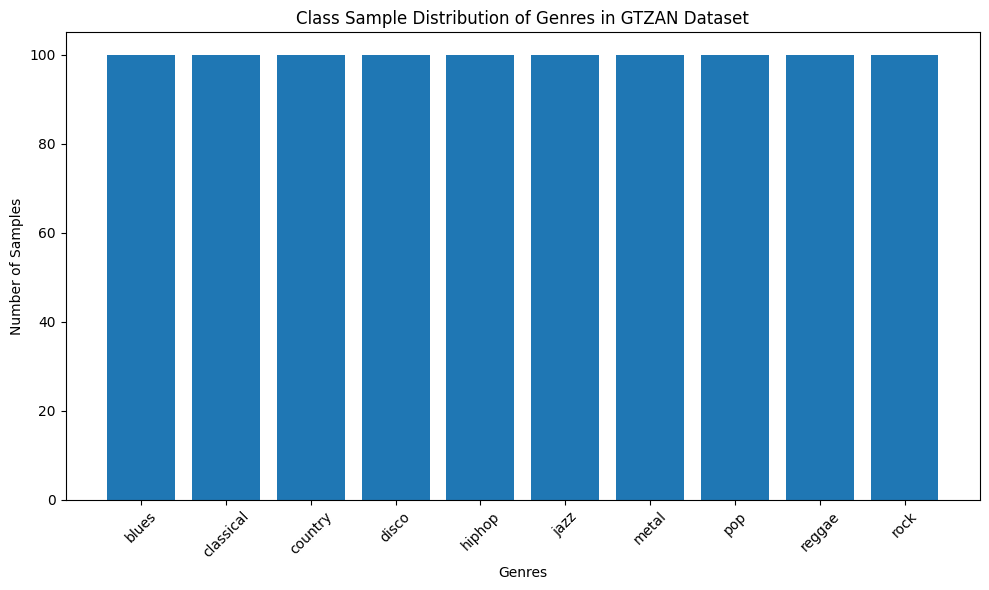

In [6]:
# Plot the class distributions
# Plot the class distributions
plt.figure(figsize=(10, 6))
plt.bar(samples_per_class.keys(), samples_per_class.values())
plt.xlabel('Genres')
plt.ylabel('Number of Samples')
plt.title('Class Sample Distribution of Genres in GTZAN Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Any additional data visualizations or exploratory analysis - This is optional, but highly recommended
data = {}
for genre in os.listdir(data_path):
  data[genre] = pd.Series(os.listdir(data_path + "/" + genre))

df = pd.DataFrame(data)
print(df.head(3))

             blues            classical            country            disco  \
0  blues.00001.wav  classical.00001.wav  country.00066.wav  disco.00000.wav   
1  blues.00003.wav  classical.00000.wav  country.00065.wav  disco.00002.wav   
2  blues.00000.wav  classical.00003.wav  country.00067.wav  disco.00001.wav   

             hiphop            jazz            metal            pop  \
0  hiphop.00000.wav  jazz.00000.wav  metal.00000.wav  pop.00001.wav   
1  hiphop.00004.wav  jazz.00001.wav  metal.00001.wav  pop.00000.wav   
2  hiphop.00001.wav  jazz.00002.wav  metal.00002.wav  pop.00005.wav   

             reggae            rock  
0  reggae.00000.wav  rock.00000.wav  
1  reggae.00001.wav  rock.00001.wav  
2  reggae.00002.wav  rock.00002.wav  


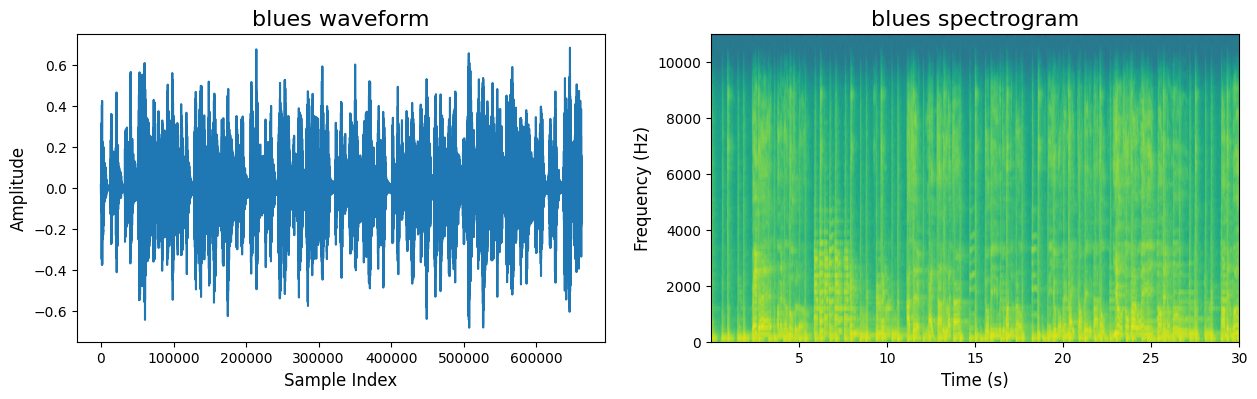

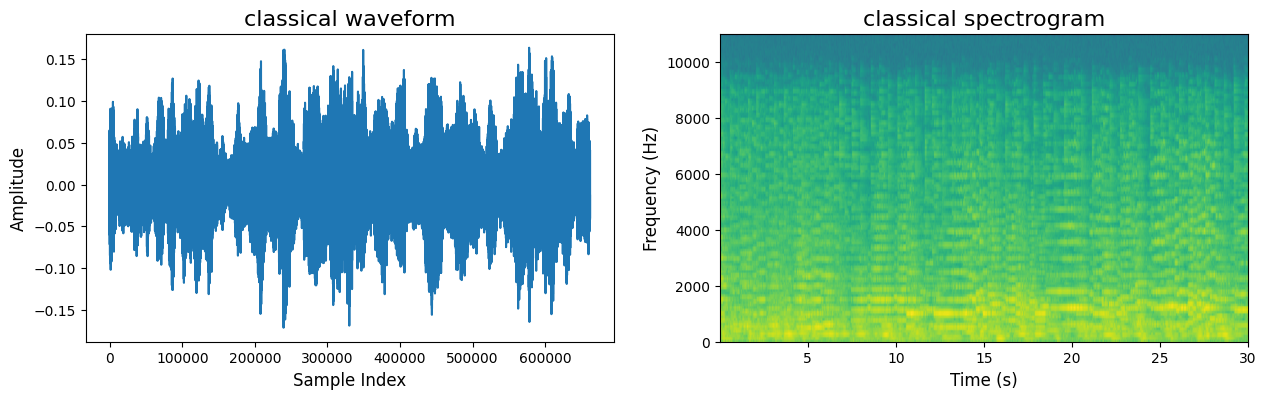

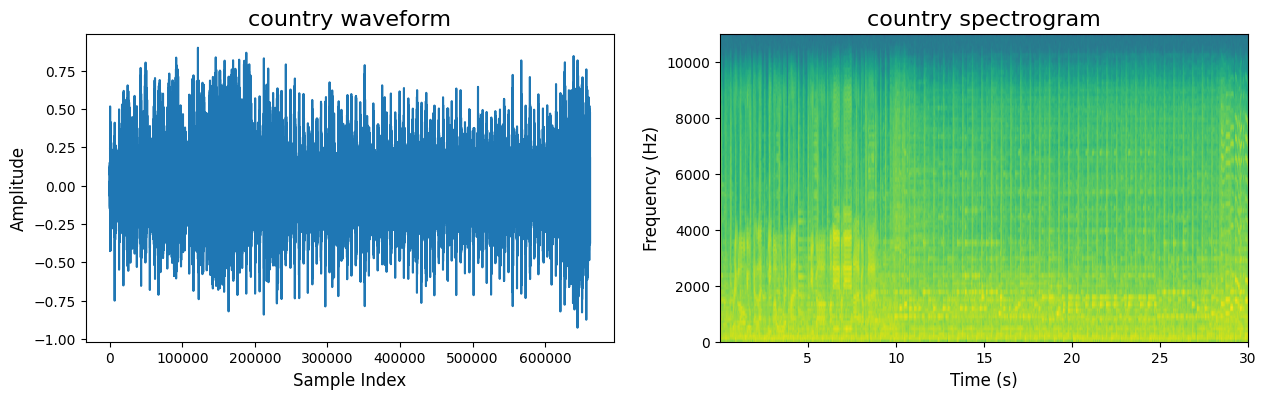

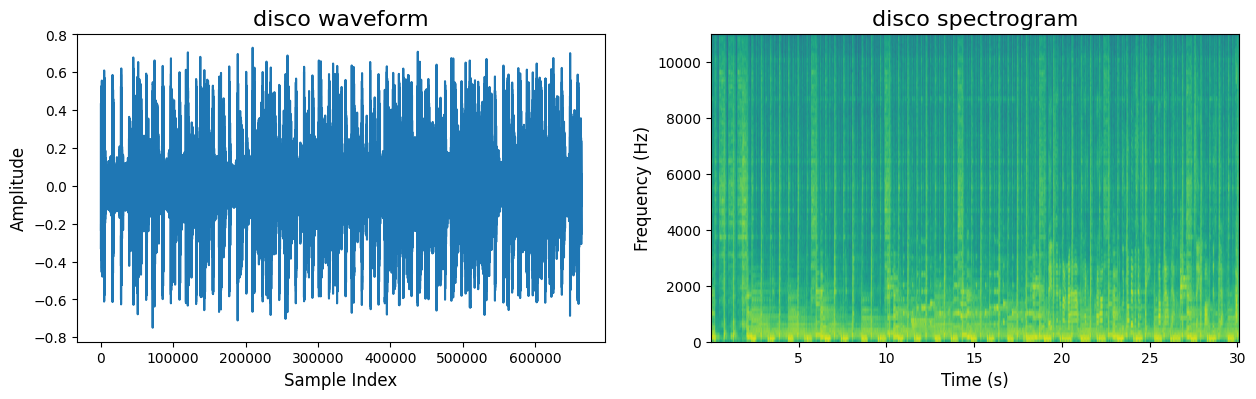

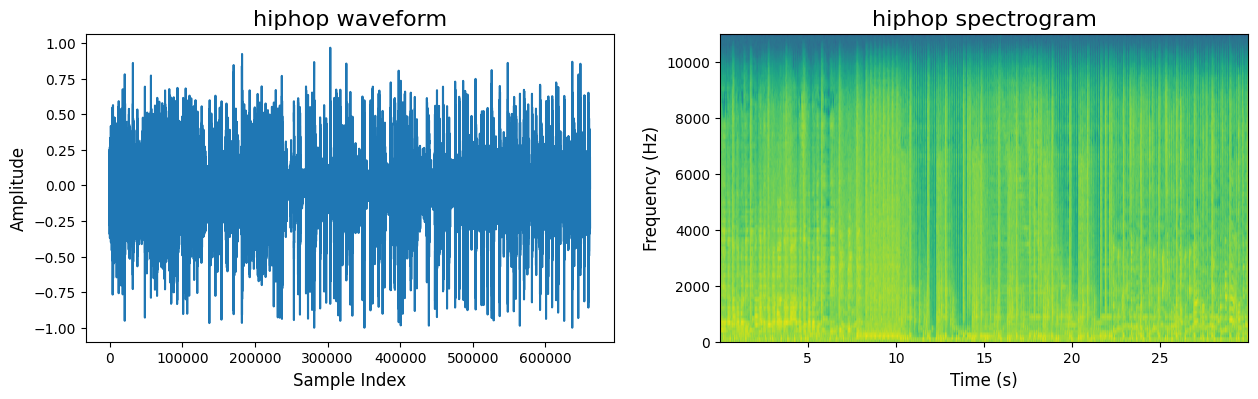

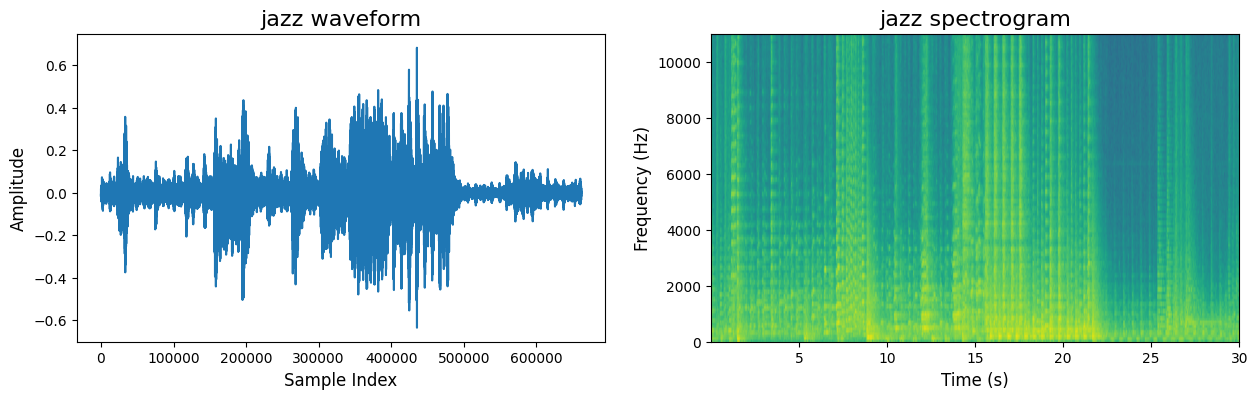

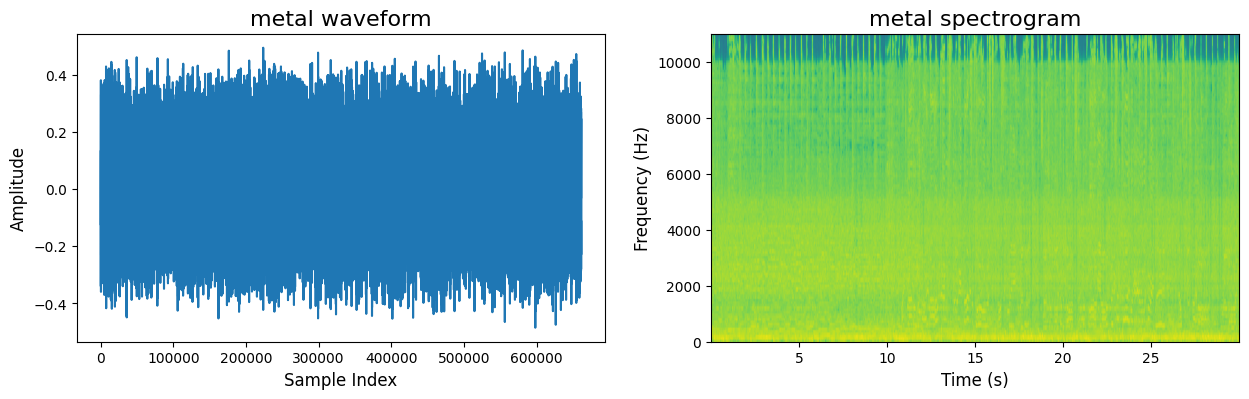

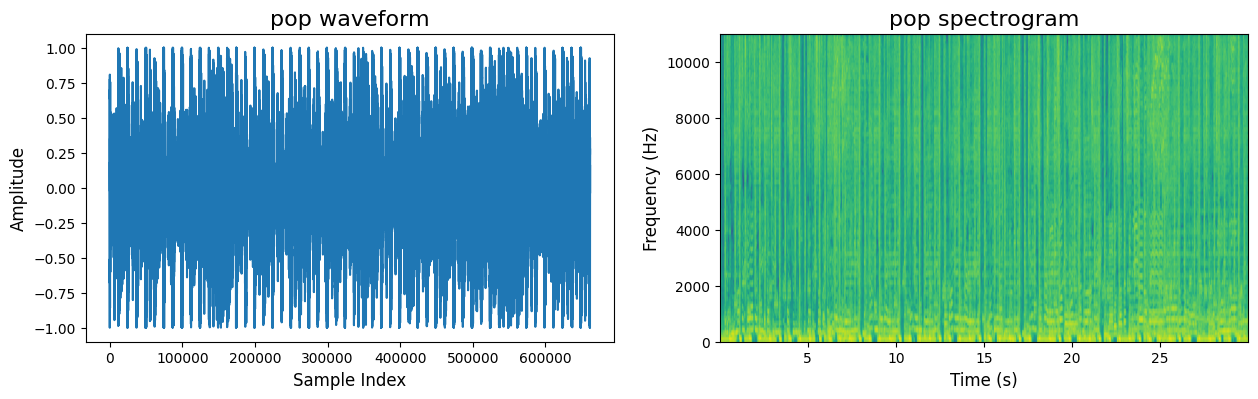

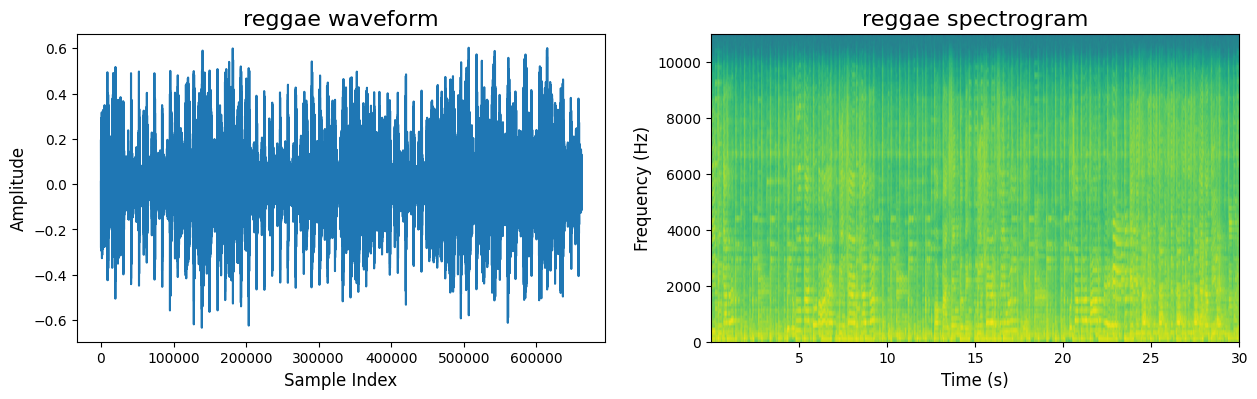

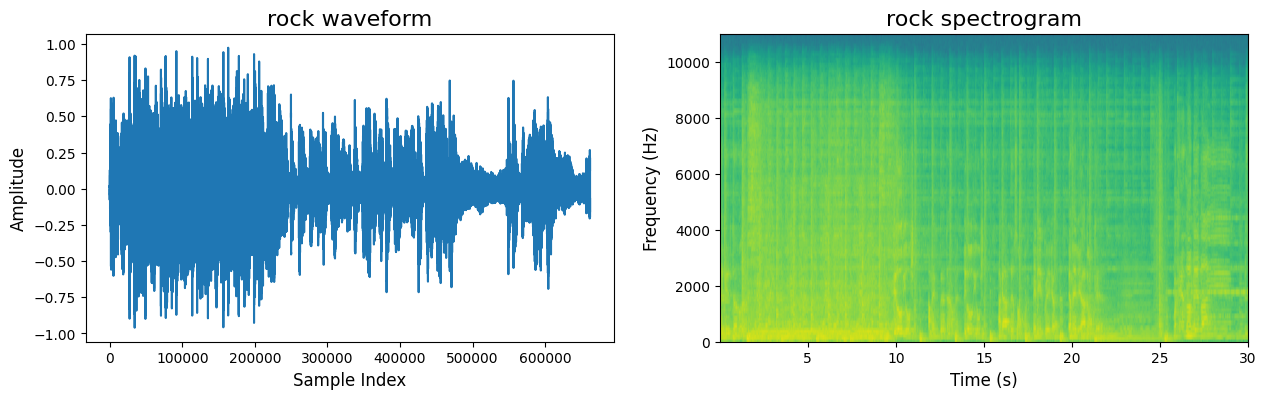

In [8]:
# Any additional data visualizations or exploratory analysis - This is optional, but highly recommended
for i in os.listdir(data_path):
  waveform, sr = librosa.load(data_path + "/" + i + "/" + df[i].iloc[0])

  plt.figure(figsize = (15, 4))
  plt.subplot(1, 2, 1)
  plt.plot(waveform)
  plt.title(i + ' waveform', fontsize = 16)
  plt.xlabel('Sample Index', fontsize = 12)
  plt.ylabel('Amplitude', fontsize = 12)

  # Displaying spectrogram
  plt.subplot(1, 2, 2)
  plt.specgram(waveform, Fs = sr)
  plt.title(i + ' spectrogram', fontsize = 16)
  plt.xlabel('Time (s)', fontsize = 12)
  plt.ylabel('Frequency (Hz)', fontsize = 12)

# 2. Preprocessing

The minimum you need here is to:
1. Create your DataLoaders,
2. Create train and test splits.

Please do normalization/scaling or any additional proposed preproccessing here (Including anyt preprocessing steps you have included in your proposal.)


In [9]:
# Any additional preproccessing

# vggish is a CNN that I am using transfer learning in conjunction to my own CNN
# vggish extracts features from the audio file spectrogram such as mel spectrograms
vggish = hub.load('https://tfhub.dev/google/vggish/1')

data = []

for folder in os.listdir(data_path):
    folderPath = os.path.join(data_path, folder)

    for file in tqdm(os.listdir(folderPath), desc = f'Processing folder {folder}'):
        filePath = os.path.join(folderPath, file)

        # swallows error if during crashes during feature extraction
        try:
          waveform, sr = librosa.load(filePath)
          waveform, _ = librosa.effects.trim(waveform)

          features = vggish(waveform).numpy()
        except:
          features = None

        if features is not None:
            data.append([features, folder])

data = pd.DataFrame(data, columns = ['Features', 'Class'])

features = data['Features'].tolist()
features = pad_sequences(features, dtype = 'float32', padding = 'post', truncating = 'post')

encoder = LabelEncoder()
labels = encoder.fit_transform(data['Class'])
labels = to_categorical(labels)

Processing folder classical:  99%|█████████▉| 99/100 [02:23<00:01,  1.35s/it]<ipython-input-9-3a28ba46524e>:17: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, sr = librosa.load(filePath)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing folder rock: 100%|██████████| 100/100 [02:29<00:00,  1.50s/it]


In [49]:
# Split the dataset into train and test
# Hint: This is very similar to assignment 2

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state = 42)

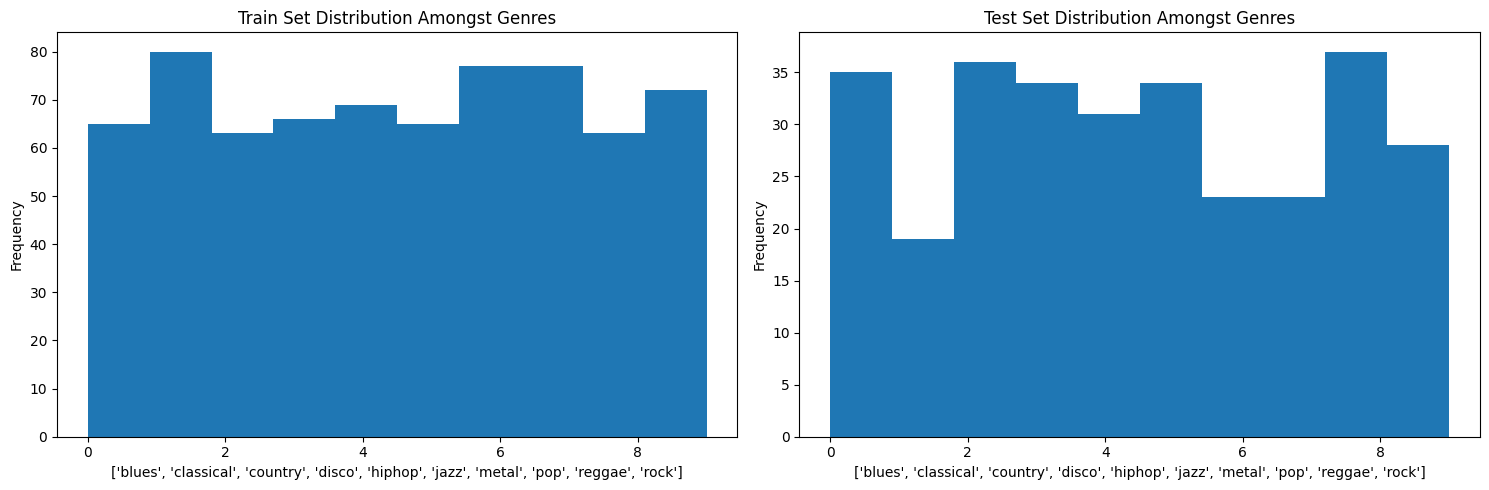

In [11]:
# Plot the distribution between train and test classes

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(train_labels.argmax(axis=1), bins=10)
plt.title('Train Set Distribution Amongst Genres')
plt.xlabel(os.listdir(data_path))
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(test_labels.argmax(axis=1), bins=10)
plt.title('Test Set Distribution Amongst Genres')
plt.xlabel(os.listdir(data_path))
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 3. Your proposed model

🎧🎸 Explain the steps you took to tune your model and how each step affected your performance. (This answer can be as detailed as you want, don't keep it short.)

* In case you are using grid search for hyperparamter tuning: Why and how are you choosing the grid limits/steps? Give details.

📻🎹 Beginning, I used transfer learning during the preprocessing by using VGGish, a Google developed deep learning model that takes in a spectrogram (extracted via librosa) and generalizes it via a CNN, making it easier for my CNN to differentiate between genres by magnifying the differences in the spectrogram.

Initially, my model used the categorical cross entropy function when calculating the loss, however, I switched to mean squared error (L2) loss, and then to hinge loss, which increased my f1-score by a few percentage points.

The convolution layers were also initially similar to the size of my assignment 2 layers, being 8 and 16 as output channels for each layer respectfully. With the use of Keras and the preprocessing done by VGGish, I was able to use larger convolution output layers, increasing the accuracy greatly. Changing the output layers from 8 and 16 to 32 and 64 respectfully, this allowed me to get more accurate confusion matrices.

Lastly, I added the softmax layer to weight the outputs based on probability, allowing the model to further recognize the correct classification based on a percentage of correctness based on the outputs. This increased my f1-score by a few percentage points as well.

With only the preprocessing and no optimizations, the model had an accuracy of around 40$. After my optimizations, the model now has an accuracy of roughly 52% and can be generalized fairly well against other training sets.

Feel free to add in more code blocks. Please include some comments on what you are doing within the code.

*Add comments to describe the key concepts of the code and its function. It does not need to be line-by-line. Keep it short.*

In [50]:
# Functions to help with f1-score calculation

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [51]:
# Define your model

# My model sits around 50-60% when training for the first time, but when run consecutively, it jumps to around 75-80%.
# Also, increasing the epochs to 50 increases the f1-score to around 80% off the rip, but to aide in time constraints
# while marking, I've lowered it to 25 for a less accurate model, but quicker execution for you.

my_model = Sequential([
    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (43, 128, 1)),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Flatten(),

    layers.Dense(64, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(10, activation = 'softmax')
])

In [52]:
# Initialize the model, loss function, and optimizer

my_model.compile(optimizer = 'adam', loss = 'hinge', metrics=['acc',f1_m,precision_m, recall_m])

In [53]:
#Train

history = my_model.fit(
    train_features, train_labels,
    validation_data = (test_features, test_labels),
    epochs = 25
)

Epoch 1/25
22/22 [==============================] - 9s 332ms/step - loss: 0.9996 - acc: 0.5854 - f1_m: 0.5700 - precision_m: 0.7079 - recall_m: 0.4881 - val_loss: 1.0619 - val_acc: 0.4533 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/25
22/22 [==============================] - 7s 313ms/step - loss: 0.9579 - acc: 0.7848 - f1_m: 0.7951 - precision_m: 0.8593 - recall_m: 0.7417 - val_loss: 1.0701 - val_acc: 0.2300 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/25
22/22 [==============================] - 7s 323ms/step - loss: 0.9401 - acc: 0.8824 - f1_m: 0.8897 - precision_m: 0.9284 - recall_m: 0.8553 - val_loss: 1.0721 - val_acc: 0.1467 - val_f1_m: 0.1079 - val_precision_m: 0.4833 - val_recall_m: 0.0625
Epoch 4/25
22/22 [==============================] - 10s 451ms/step - loss: 0.9286 - acc: 0.9125 - f1_m: 0.9177 - precision_m: 0.9440 - recall_m: 0.8937 - val_loss: 1.0740 - val_acc: 0.1633 - val_f1_m: 0.1320 

In [54]:
# Test the model suign one chosen metric
score = my_model.evaluate(test_features, test_labels)[2] * 100
print(f'f1-score of model : {score:.2f}%')

10/10 [==============================] - 1s 54ms/step - loss: 0.9864 - acc: 0.6167 - f1_m: 0.6163 - precision_m: 0.6609 - recall_m: 0.5781
f1-score of model : 61.63%


10/10 [==============================] - 1s 51ms/step


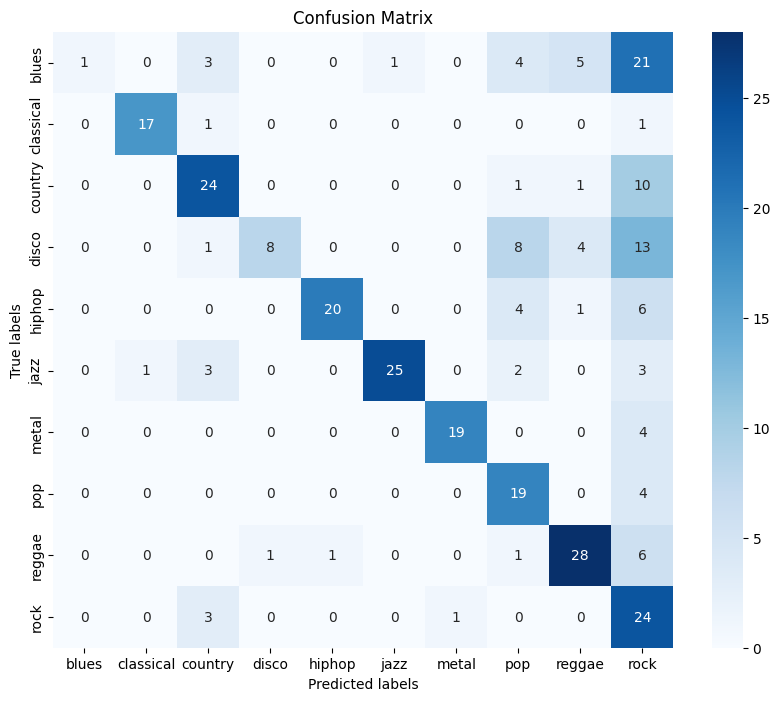

In [55]:
# Compute and plot the confusion matrix
my_test_features = test_features
my_test_labels = test_labels
my_predictions = my_model.predict(my_test_features)
my_predicted_labels = np.argmax(my_predictions, axis=1)
my_true_labels = np.argmax(my_test_labels, axis=1)

# Compute confusion matrix
my_conf_matrix = confusion_matrix(my_true_labels, my_predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(my_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=os.listdir(data_path), yticklabels=os.listdir(data_path))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 4. Your pretrained model

The library below is a great source that possibly covers your proposed pretrained model selected in your proposal. There is a link provided that covers an example implementation. It's very straightforward and needs minimum tweaks.

[Pytorch pretrained models](https://pytorch.org/vision/stable/models.html)

In [18]:
# Pretrained models and pretrained weights
import torchvision.models as models


Feel free to adjust the code blocks in this section as you see fit.


**Note that your code needs to run flawlessly. (If you are using any pretrained model that is not covered in the library above.) Therefore, please make sure you have every required installations and libraries imported under section 1.1.**

In [19]:
# Reshape to fit as inputs into VGG16

trainX_rgb = np.array([np.stack((img,) * 3, axis=-1) for img in train_features])
testX_rgb = np.array([np.stack((img,) * 3, axis=-1) for img in test_features])

trainX_rgb = trainX_rgb.reshape(trainX_rgb.shape[0], trainX_rgb.shape[1], trainX_rgb.shape[2], 3)
testX_rgb = testX_rgb.reshape(testX_rgb.shape[0], testX_rgb.shape[1], testX_rgb.shape[2], 3)

In [20]:
# Define the pretrained model

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False, input_shape=(43, 128, 3))

# Freeze the pre-trained layers
for layer in model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = Flatten()(model.output)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output = Dense(10, activation='softmax')(x)

In [21]:
# Initialize the model, loss function, and optimizer

model = Model(inputs=model.input, outputs=output)

model.compile(optimizer=Adam(), loss='hinge', metrics=['acc', f1_m, precision_m, recall_m])

In [22]:
#Train

history = model.fit(
    trainX_rgb, train_labels,
    validation_data=(testX_rgb, test_labels),
    epochs=25
)

Epoch 1/25
22/22 [==============================] - 62s 3s/step - loss: 1.0509 - acc: 0.3085 - f1_m: 0.2417 - precision_m: 0.4712 - recall_m: 0.1664 - val_loss: 1.0715 - val_acc: 0.2667 - val_f1_m: 0.0589 - val_precision_m: 0.6000 - val_recall_m: 0.0312
Epoch 2/25
22/22 [==============================] - 63s 3s/step - loss: 1.0171 - acc: 0.5165 - f1_m: 0.4631 - precision_m: 0.6540 - recall_m: 0.3611 - val_loss: 1.0671 - val_acc: 0.2600 - val_f1_m: 0.0589 - val_precision_m: 0.6000 - val_recall_m: 0.0312
Epoch 3/25
22/22 [==============================] - 57s 3s/step - loss: 1.0000 - acc: 0.5997 - f1_m: 0.5876 - precision_m: 0.7169 - recall_m: 0.4991 - val_loss: 1.0653 - val_acc: 0.2967 - val_f1_m: 0.0868 - val_precision_m: 0.7167 - val_recall_m: 0.0469
Epoch 4/25
22/22 [==============================] - 57s 3s/step - loss: 0.9911 - acc: 0.6356 - f1_m: 0.6379 - precision_m: 0.7735 - recall_m: 0.5441 - val_loss: 1.0638 - val_acc: 0.2600 - val_f1_m: 0.2029 - val_precision_m: 0.5878 - val_r

In [23]:
# Test the model using the same chosen metric as your own model
score = model.evaluate(testX_rgb, test_labels)[1] * 100
print(f'f1-score of model : {score:.2f}%')

10/10 [==============================] - 16s 2s/step - loss: 1.0044 - acc: 0.5000 - f1_m: 0.5165 - precision_m: 0.5512 - recall_m: 0.4875
f1-score of model : 50.00%


10/10 [==============================] - 16s 2s/step


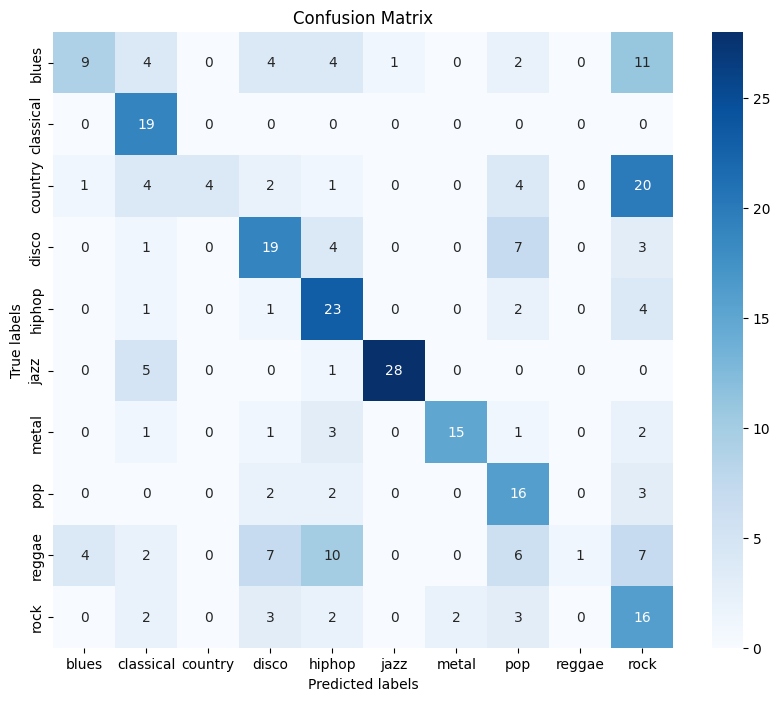

In [24]:
# Compute and plot the confusion matrix
predictions = model.predict(testX_rgb)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=os.listdir(data_path), yticklabels=os.listdir(data_path))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Comparisons

🎧🎸 How did you compare your proposed model and the pretrained model in terms of performance? Is your model doing a better/worse job than the pretrained model? Why?
Describing confusion matrices is neccessary to answer this question.
You can also include other metrics, such as accuracy, train-time, etc.

📻🎹 My model performed better in terms of accuracy since a large chunk of the work is done in the preprocessing when extracting the spectrograms via VGGish and making their differences much more apparent before being passed to my CNN model. My model also performed better in terms of stopping rate, it tended to need much less epochs to reach a generalized f1-score than the pretrained model did, usually stopping after around 11-15 epochs whereas the pretrained model would stop only after it executed all imposed epochs. (I have since removed the stopping rate as it began to become spotty, but the analysis still applies). I would accredit this to the use of the hinge loss function as it helps to find the local minimum faster, and I would also accredit its ability to find the local minimum faster to the extraction of features via VGGish. Lastly, my model performed far superior in terms of speed as each epoch in my model took around 10s or less, whereas each epoch in the VGG16 took around one minute, give or take a few seconds. I would accredit this to VGG16 having 16 layers including convolution, max pooling layers and softmax layers. Whereas my model only has 6 layers including these convolution, max pooling, and softmax layers.

VGGish is a specific branch of a CNN that is used mainly for extracting features from a spectrogram whereas VGG16 is for general image classification. Because of this, my model has essentially two looks at the spectrograms when training, making its f1-score far superior than the single pass of VGG16.

Lastly, as you can see by the differences in confusion matrices, my model performed much better in terms of all category classification than the pretrained VGG16 model. This is also acredited to the two looks taken by my model during preprocessing and then training.

🎧🎸 What will you do differently? Why?
> In terms of the dataset, preproccessing, modeling, etc.

📻🎹 I would look into the misclassification of both pop vs disco and rock vs country. There were more than a couple instances where my model incorrectly classified a disco song as a pop song and vice versa. The same went for rock and country. I can attribute this to the very similar spectrogram that pop and disco share as well as rock and country share (depicted below) as even looking at some example photos, its hard for myself to tell the difference. I would potentially solve this issue by looking into the softmax layer to give more weight to either, depending on what the proper genre would be.

As per the preprocessing, I would also double the amount of training and test samples for each genres respectfully, having these new samples set as either random crops of spectrograms, or introducing purposeful noise into the sample. This will force the model to learn based on limited amount and potentially not correct data, allowing it to determine what is a correct sample and what is a tampered sample.

All done! 🎶💃🕺

10/10 [==============================] - 1s 53ms/step


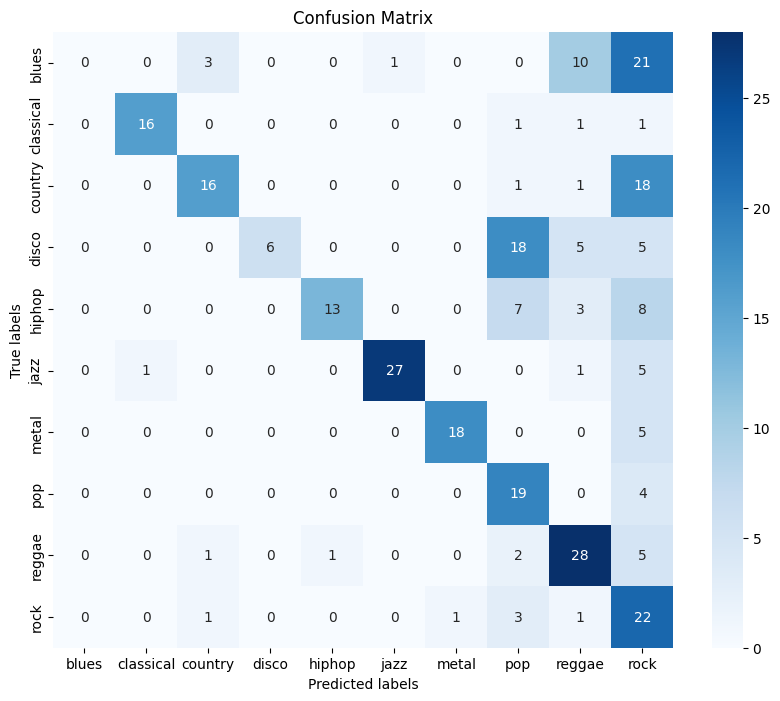

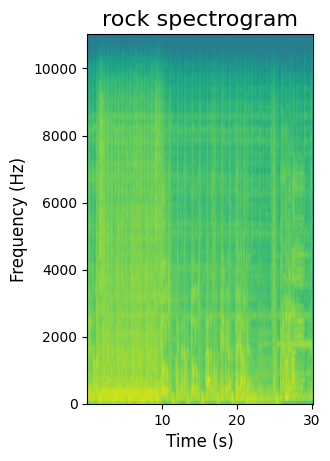

In [34]:
# Compute and plot the confusion matrix
my_predictions = my_model.predict(my_test_features)
my_predicted_labels = np.argmax(my_predictions, axis=1)
my_true_labels = np.argmax(my_test_labels, axis=1)

# Compute confusion matrix
my_conf_matrix = confusion_matrix(my_true_labels, my_predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(my_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=os.listdir(data_path), yticklabels=os.listdir(data_path))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

for i in os.listdir(data_path):
  if (i == "rock" or i == "country" or i == "disco" or i == "pop"):
    waveform, sr = librosa.load(data_path + "/" + i + "/" + df[i].iloc[0])

    plt.subplot(1, 2, 2)
    plt.specgram(waveform, Fs = sr)
    plt.title(i + ' spectrogram', fontsize = 16)
    plt.xlabel('Time (s)', fontsize = 12)
    plt.ylabel('Frequency (Hz)', fontsize = 12)

## 5. Optional challenge!

You are not graded for this part, but I will provide feedback if you gave it a shot!

Believe me, it is a cool piece 🎺

As your model can classify music genres, can you challenge yourselves to have your model listen to you playing a piece of music (e.g., on Spotify) and classify its genre in real-time?

**Hint 01:** ```pyaudio``` is a library you can use.

**Hint 02:** You need to do the same preproccessing on the live data as you did for your model.

**Hint 03:** You need to put your model into the ```.eval()``` state. Don't forget to save the model weights so that you can do load it using ```model.load_state_dict(torch.load('MyModel_weights.pth'))```

**Hint 04:** Your code block needs to listen to the music you are playing, so maybe you can put it in a ```try: while True:``` and ```except KeyboardInterrupt``` loop.